# Question 2

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#making entries for the normal equation matrix

def x_make(x:list, n:int):
    out=0
    for i in x:
        out+=i**n
    return out

def y_make(x:list,y:list,n:int):
    out=0
    for i in range(len(y)):
        out+=y[i]*x[i]**n
    return out

#making the normal equation matrix and the target vector in Ax=b

def normal_make(x:list, y:list, n:int):
    normal_matrix=[0]*(n+1)
    for i in range(n+1):
        temp_vec=np.zeros(n+1)
        for j in range(n+1):
            temp_vec[j]=x_make(x,i+j)
        normal_matrix[i]=temp_vec
    
    target_vec=np.zeros((n+1,1))
    for i in range(n+1):
        target_vec[i]=y_make(x,y,i)

    return (np.asarray(normal_matrix), target_vec)

#solving the normal equation system
def solve_eq(A):
    return np.linalg.solve(A[0],A[1]).T[0]
#evaluating the polynomial at a point x
def evaluate(x:float,coefflist):
    out=0
    for i in range(len(coefflist)):
        out+=coefflist[i]*x**i
    return out
#calculating the rmse
def rmse(x,y,coefflist):
    out=0
    for i in range(len(x)):
        out+=(evaluate(x[i],coefflist)-y[i])**2
    return np.sqrt(out/len(x))



## Question 2(a)

quadratic coefficients (starting from x^0): [ 2.97771429 -0.85357143  1.95535714]


cubic coefficients (starting from x^0): [ 2.89771429  0.5797619  -0.54464286  1.04166667]


RMSE for quadratic: 0.11345987333477371
RMSE for cubic: 0.008552359741197635


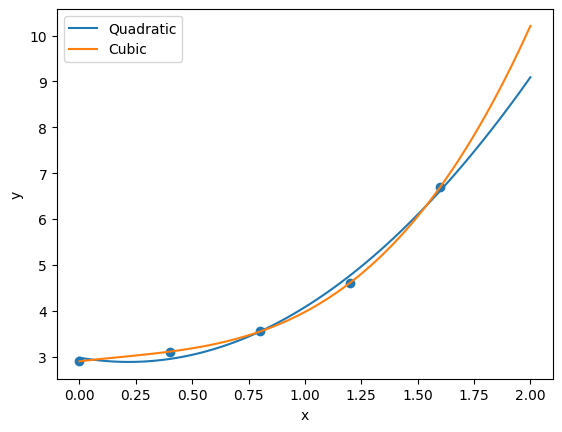

In [37]:

X=[0,0.4,0.8,1.2,1.6]
Y=[2.9,3.1,3.56,4.6,6.7]

solved_3=solve_eq(normal_make(X,Y,3))

solved_2=solve_eq(normal_make(X,Y,2))

print('quadratic coefficients (starting from x^0):',solved_2)
print('\n')
print('cubic coefficients (starting from x^0):',solved_3)
print('\n')

print('RMSE for quadratic:',rmse(X,Y,solved_2))
print('RMSE for cubic:',rmse(X,Y,solved_3))

x=np.linspace(0,2,100)
y2=[]
y3=[]
for i in x:
    y2.append(evaluate(i,solved_2))
    y3.append(evaluate(i,solved_3))

plt.plot(x,y2,label='Quadratic')
plt.plot(x,y3,label='Cubic')
plt.scatter(X,Y)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()



## Question 2(b)

In [38]:
def pow_exp(x,n):
    out=0
    for i in x:
        out+=np.exp(n*i)  #summing up the exponential terms
                        #derived as in the report
    return out

def normal_make_exp(x,y):
    normal_mat=np.asarray([[pow_exp(x,-6),pow_exp(x,-5)],[pow_exp(x,-5),pow_exp(x,-4)]]) #normal matrix

    target=[0,0]

    for i in range(len(x)):
        target[0]+=y[i]*np.exp(-3*x[i])
        target[1]+=y[i]*np.exp(-2*x[i])

    return normal_mat, np.reshape(target,(2,1))


def eval_exp(x,coefflist):
    out=coefflist[0]*np.exp(-3*x)+coefflist[1]*np.exp(-2*x)  #evaluating the least squares fit at x
    return out


A=[0.1,0.2,0.3,0.4]
B=[0.76,0.58,0.44,0.35]


print(['a','b'],"=",solve_eq(normal_make_exp(A,B)))  


['a', 'b'] = [0.68532816 0.30584456]


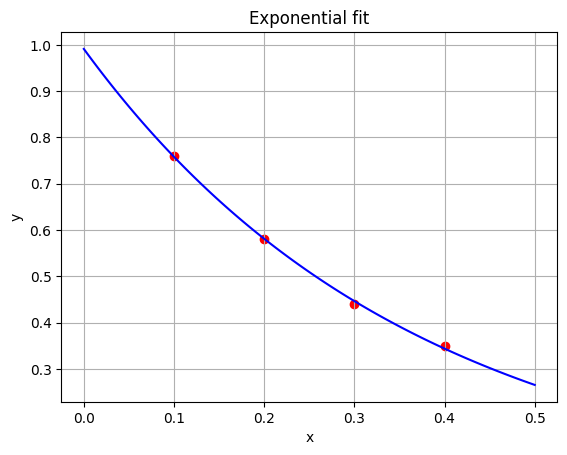

In [39]:
x_plot=np.linspace(0,0.5,100)
y_plot=[eval_exp(i,solve_eq(normal_make_exp(A,B))) for i in x_plot]

plt.plot(x_plot,y_plot,color='blue')
plt.scatter(A,B,color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential fit')

plt.show()


## Problem 2(c)

## Differentiation Problem
## Applicable Formulae:

First derivative: Three point formulae: Mid Point, End Point, Five point: Midpoint

Second Derivative: Three point formula: Mid Point, Five Point: Midpoint

Third Derivative: Five point: Midpoint

Five point endpoint formulae are not applicable here, since $2+kh$ will go out of index.

For mid point formulae, $h=\pm 0.1$ does not matter, due to symmetry of the arguments.

In [40]:
import sympy as sp

def f(x):
    return x*np.e**(x)

#evaluating the derivatives at x=2 using sympy

x=sp.Symbol('x')

print("True value of f\'(x): ",sp.diff(f(x),x).subs(x,2))
print("True value of f\'\'(x): ",sp.diff(f(x),x,x).subs(x,2))
print("True value of f\'\'\'(x): ",sp.diff(f(x),x,x,x).subs(x,2))

differ=[sp.diff(f(x),x).subs(x,2),sp.diff(f(x),x,x).subs(x,2),sp.diff(f(x),x,x,x).subs(x,2)]




True value of f'(x):  22.1671682967919
True value of f''(x):  29.5562243957226
True value of f'''(x):  36.9452804946532


In [41]:
def f(i,n,h):
    req_pt=x[i]+n*h
    req_index=x.index(req_pt)
    return y[req_index]

    
#A_B_C stands for: A-th derivative, B-midpoint/endpoint, C-3/5 point formula
#h_type: 1: h=x[1]-x[0], 2: h=x[2]-x[0], 3: h=x[0]-x[1]


def I_E_3(x,y,pt,h_type:int):

    i=x.index(pt)
    if h_type==1:
        h=round(x[1]-x[0],1)
    elif h_type==2:
        h=round(x[2]-x[0],1)
    elif h_type==3:
        h=round(x[0]-x[1],1)

    def f(n):
        req_pt=x[i]+n*h
        req_index=x.index(req_pt)
        return y[req_index]
    
    #endpoint formula for first derivative
    
    diff_result=(-3*f(0)+4*f(1)-f(2))/(2*h)
    return diff_result

def I_M_3(x,y,pt,h_type:int):
    i=x.index(pt)
    if h_type==1:
        h=round(x[1]-x[0],1)
    elif h_type==2:
        h=round(x[2]-x[0],1)
    elif h_type==3:
        h=round(x[0]-x[1],1)

    def f(n):
        req_pt=x[i]+n*h
        req_index=x.index(req_pt)
        return y[req_index]
    
    
    
    diff_result=(f(1)-f(-1))/(2*h)
    return diff_result
    


def I_M_5(x,y,pt,h_type:int):
    i=x.index(pt)
    if h_type==1:
        h=round(x[1]-x[0],1)
    elif h_type==2:
        h=round(x[2]-x[0],1)
    elif h_type==3:
        h=round(x[0]-x[1],1)

    def f(n):
        req_pt=x[i]+n*h
        req_index=x.index(req_pt)
        return y[req_index]
    
    #midpoint formula for first derivative
    
    diff_result=(-f(2)+8*f(1)-8*f(-1)+f(-2))/(12*h)
    return diff_result


def II_M_3(x,y,pt,h_type:int):
    i=x.index(pt)
    if h_type==1:
        h=round(x[1]-x[0],1)
    elif h_type==2:
        h=round(x[2]-x[0],1)
    elif h_type==3:
        h=round(x[0]-x[1],1)

    def f(n):
        req_pt=x[i]+n*h
        req_index=x.index(req_pt)
        return y[req_index]
    
    #midpoint formula for second derivative
    
    diff_result=(f(1)-2*f(0)+f(-1))/(h**2)
    return diff_result


def II_M_5(x,y,pt,h_type:int):
    i=x.index(pt)
    if h_type==1:
        h=round(x[1]-x[0],1)
    elif h_type==2:
        h=round(x[2]-x[0],1)
    elif h_type==3:
        h=round(x[0]-x[1],1)

    def f(n):
        req_pt=x[i]+n*h
        req_index=x.index(req_pt)
        return y[req_index]
    
    #midpoint formula for second derivative
    
    diff_result=(-f(2)+16*f(1)-30*f(0)+16*f(-1)-f(-2))/(12*(h**2))
    return diff_result

def III_M_5(x,y,pt,h_type:int):
    i=x.index(pt)
    if h_type==1:
        h=round(x[1]-x[0],1)
    elif h_type==2:
        h=round(x[2]-x[0],1)
    elif h_type==3:
        h=round(x[0]-x[1],1)

    def f(n):
        req_pt=x[i]+n*h
        req_index=x.index(req_pt)
        return y[req_index]
    
    #midpoint formula for third derivative
    
    diff_result=(f(2)-2*f(1)+2*f(-1)-f(-2))/(2*(h**3))
    return diff_result




In [42]:
eval_list=[I_E_3,I_M_3,I_M_5,II_M_3,II_M_5,III_M_5]

x=[1.8,1.9,2.0,2.1,2.2]
y=[10.889365,12.703199,14.778112,17.148957,19.855030]

output_dict={'Order':[],'Method':[],'h':[],'Value':[],'Absolute error':[], '3 or 5 point':[]} #for storing the output

def order_append(string):
    if string.split('_')[0]=='I':
        return 'First derivative'
    elif string.split('_')[0]=='II':
        return 'Second derivative'
    elif string.split('_')[0]=='III':
        return 'Third derivative'

def method_append(string):
    if string.split('_')[1]=='E':
        return 'Endpoint'
    elif string.split('_')[1]=='M':
        return 'Midpoint'

def pt_no_append(string):
    if string.split('_')[2]=='3':
        return '3 points'
    elif string.split('_')[2]=='5':
        return '5 points'

#The following code is for printing the output in a nice format

#Try and except is used to avoid errors when the function is not defined for a particular h

#The output is stored in a dictionary and then converted to a dataframe for printing

for i in eval_list:   
    try: 
        print(i.__name__,i(x,y,2.0,1),"h=0.1")
        output_dict['Order'].append(order_append(i.__name__))
        output_dict['h'].append(0.1)
        output_dict['Method'].append(method_append(i.__name__))
        output_dict['Value'].append(i(x,y,2.0,1))
        output_dict['3 or 5 point'].append(pt_no_append(i.__name__))

        if i.__name__[0:2]=='I_':
            print("absolute error:",abs(i(x,y,2.0,1)-differ[0]))
            output_dict['Absolute error'].append(abs(i(x,y,2.0,1)-differ[0]))
            
        elif i.__name__[0:3]=='II_':
            print("absolute error:",abs(i(x,y,2.0,1)-differ[1]))
            output_dict['Absolute error'].append(abs(i(x,y,2.0,1)-differ[1]))

        elif i.__name__[0:4]=='III_':
            print("absolute error:",abs(i(x,y,2.0,1)-differ[2]))
            output_dict['Absolute error'].append(abs(i(x,y,2.0,1)-differ[2]))

        
        
        print('\n')
    except: 
        pass
    try: 
        print(i.__name__,i(x,y,2.0,2),"h=0.2")
        output_dict['Order'].append(order_append(i.__name__))
        output_dict['h'].append(0.2)
        output_dict['Method'].append(method_append(i.__name__))
        output_dict['Value'].append(i(x,y,2.0,2))
        output_dict['3 or 5 point'].append(pt_no_append(i.__name__))

        if i.__name__[0:2]=='I_':
            print("absolute error:",abs(i(x,y,2.0,2)-differ[0]))
            output_dict['Absolute error'].append(abs(i(x,y,2.0,2)-differ[0]))

        elif i.__name__[0:3]=='II_':
            print("absolute error:",abs(i(x,y,2.0,2)-differ[1]))
            output_dict['Absolute error'].append(abs(i(x,y,2.0,2)-differ[1]))

        elif i.__name__[0:4]=='III_':
            print("absolute error:",abs(i(x,y,2.0,2)-differ[2]))
            output_dict['Absolute error'].append(abs(i(x,y,2.0,2)-differ[2]))

        
        print('\n')
    except: pass
    try: 
        print(i.__name__,i(x,y,2.0,3),"h=-0.1")
        output_dict['Order'].append(order_append(i.__name__))
        output_dict['h'].append(-0.1)
        output_dict['Method'].append(method_append(i.__name__))
        output_dict['Value'].append(i(x,y,2.0,3))
        output_dict['3 or 5 point'].append(pt_no_append(i.__name__))

        if i.__name__[0:2]=='I_':
            print("absolute error:",abs(i(x,y,2.0,3)-differ[0]))
            output_dict['Absolute error'].append(abs(i(x,y,2.0,3)-differ[0]))

        elif i.__name__[0:3]=='II_':
            print("absolute error:",abs(i(x,y,2.0,3)-differ[1]))
            output_dict['Absolute error'].append(abs(i(x,y,2.0,3)-differ[1]))

        elif i.__name__[0:4]=='III_':
            print("absolute error:",abs(i(x,y,2.0,3)-differ[2]))
            output_dict['Absolute error'].append(abs(i(x,y,2.0,3)-differ[2]))

        
        print('\n')
    except: pass


df=pd.DataFrame(output_dict)
df=round(df,5).astype(str)
df.to_latex('output.tex')
df


I_E_3 22.03230999999999 h=0.1
absolute error: 0.134858296791961


I_E_3 22.054525000000005 h=-0.1
absolute error: 0.112643296791944


I_M_3 22.228789999999996 h=0.1
absolute error: 0.0616217032080471


I_M_3 22.414162499999996 h=0.2
absolute error: 0.246994203208047


I_M_3 22.228789999999996 h=-0.1
absolute error: 0.0616217032080471


I_M_5 22.16699916666666 h=0.1
absolute error: 0.000169130125289740


I_M_5 22.16699916666666 h=-0.1
absolute error: 0.000169130125289740


II_M_3 29.593199999999868 h=0.1
absolute error: 0.0369756042772700


II_M_3 29.704274999999964 h=0.2
absolute error: 0.148050604277365


II_M_3 29.59319999999969 h=-0.1
absolute error: 0.0369756042770923


II_M_5 29.55617499999972 h=0.1
absolute error: 4.93957228790975e-5


II_M_5 29.556174999999733 h=-0.1
absolute error: 4.93957228648867e-5


III_M_5 37.074500000000114 h=0.1
absolute error: 0.129219505346867


III_M_5 37.074499999999226 h=-0.1
absolute error: 0.129219505345979




,Order,Method,h,Value,Absolute error,3 or 5 point
0,First derivative,Endpoint,0.1,22.03231,0.134858296791961,3 points
1,First derivative,Endpoint,-0.1,22.05453,0.112643296791944,3 points
2,First derivative,Midpoint,0.1,22.22879,0.0616217032080471,3 points
3,First derivative,Midpoint,0.2,22.41416,0.246994203208047,3 points
4,First derivative,Midpoint,-0.1,22.22879,0.0616217032080471,3 points
5,First derivative,Midpoint,0.1,22.167,0.000169130125289740,5 points
6,First derivative,Midpoint,-0.1,22.167,0.000169130125289740,5 points
7,Second derivative,Midpoint,0.1,29.5932,0.0369756042772700,3 points
8,Second derivative,Midpoint,0.2,29.70427,0.148050604277365,3 points
9,Second derivative,Midpoint,-0.1,29.5932,0.0369756042770923,3 points
